In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\koppu\AppData\Local\Temp\ipykernel_24344\2660915427.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("./peterson_barney_data.csv", sep=';')

In [3]:
df.head()

,gender,spkid,vowel,f0,F1,F2,F3
0,M,1,IY,160.0,240.0,2280.0,2850.0
1,M,1,IY,186.0,280.0,2400.0,2790.0
2,M,1,IH,203.0,390.0,2030.0,2640.0
3,M,1,IH,192.0,310.0,1980.0,2550.0
4,M,1,EH,161.0,490.0,1870.0,2420.0


In [4]:
df = df.rename(columns={"gender": "Sex", "spkid": "ID", "f0":"F0"})

In [5]:
df.head()

,Sex,ID,vowel,F0,F1,F2,F3
0,M,1,IY,160.0,240.0,2280.0,2850.0
1,M,1,IY,186.0,280.0,2400.0,2790.0
2,M,1,IH,203.0,390.0,2030.0,2640.0
3,M,1,IH,192.0,310.0,1980.0,2550.0
4,M,1,EH,161.0,490.0,1870.0,2420.0


In [6]:
# Code for dropping columns with any unfilled entry
df = df.replace(0, np.nan)
df = df.dropna()
df = df.reset_index()
df = df.drop("index", axis=1)
df.head()

,Sex,ID,vowel,F0,F1,F2,F3
0,M,1,IY,160.0,240.0,2280.0,2850.0
1,M,1,IY,186.0,280.0,2400.0,2790.0
2,M,1,IH,203.0,390.0,2030.0,2640.0
3,M,1,IH,192.0,310.0,1980.0,2550.0
4,M,1,EH,161.0,490.0,1870.0,2420.0


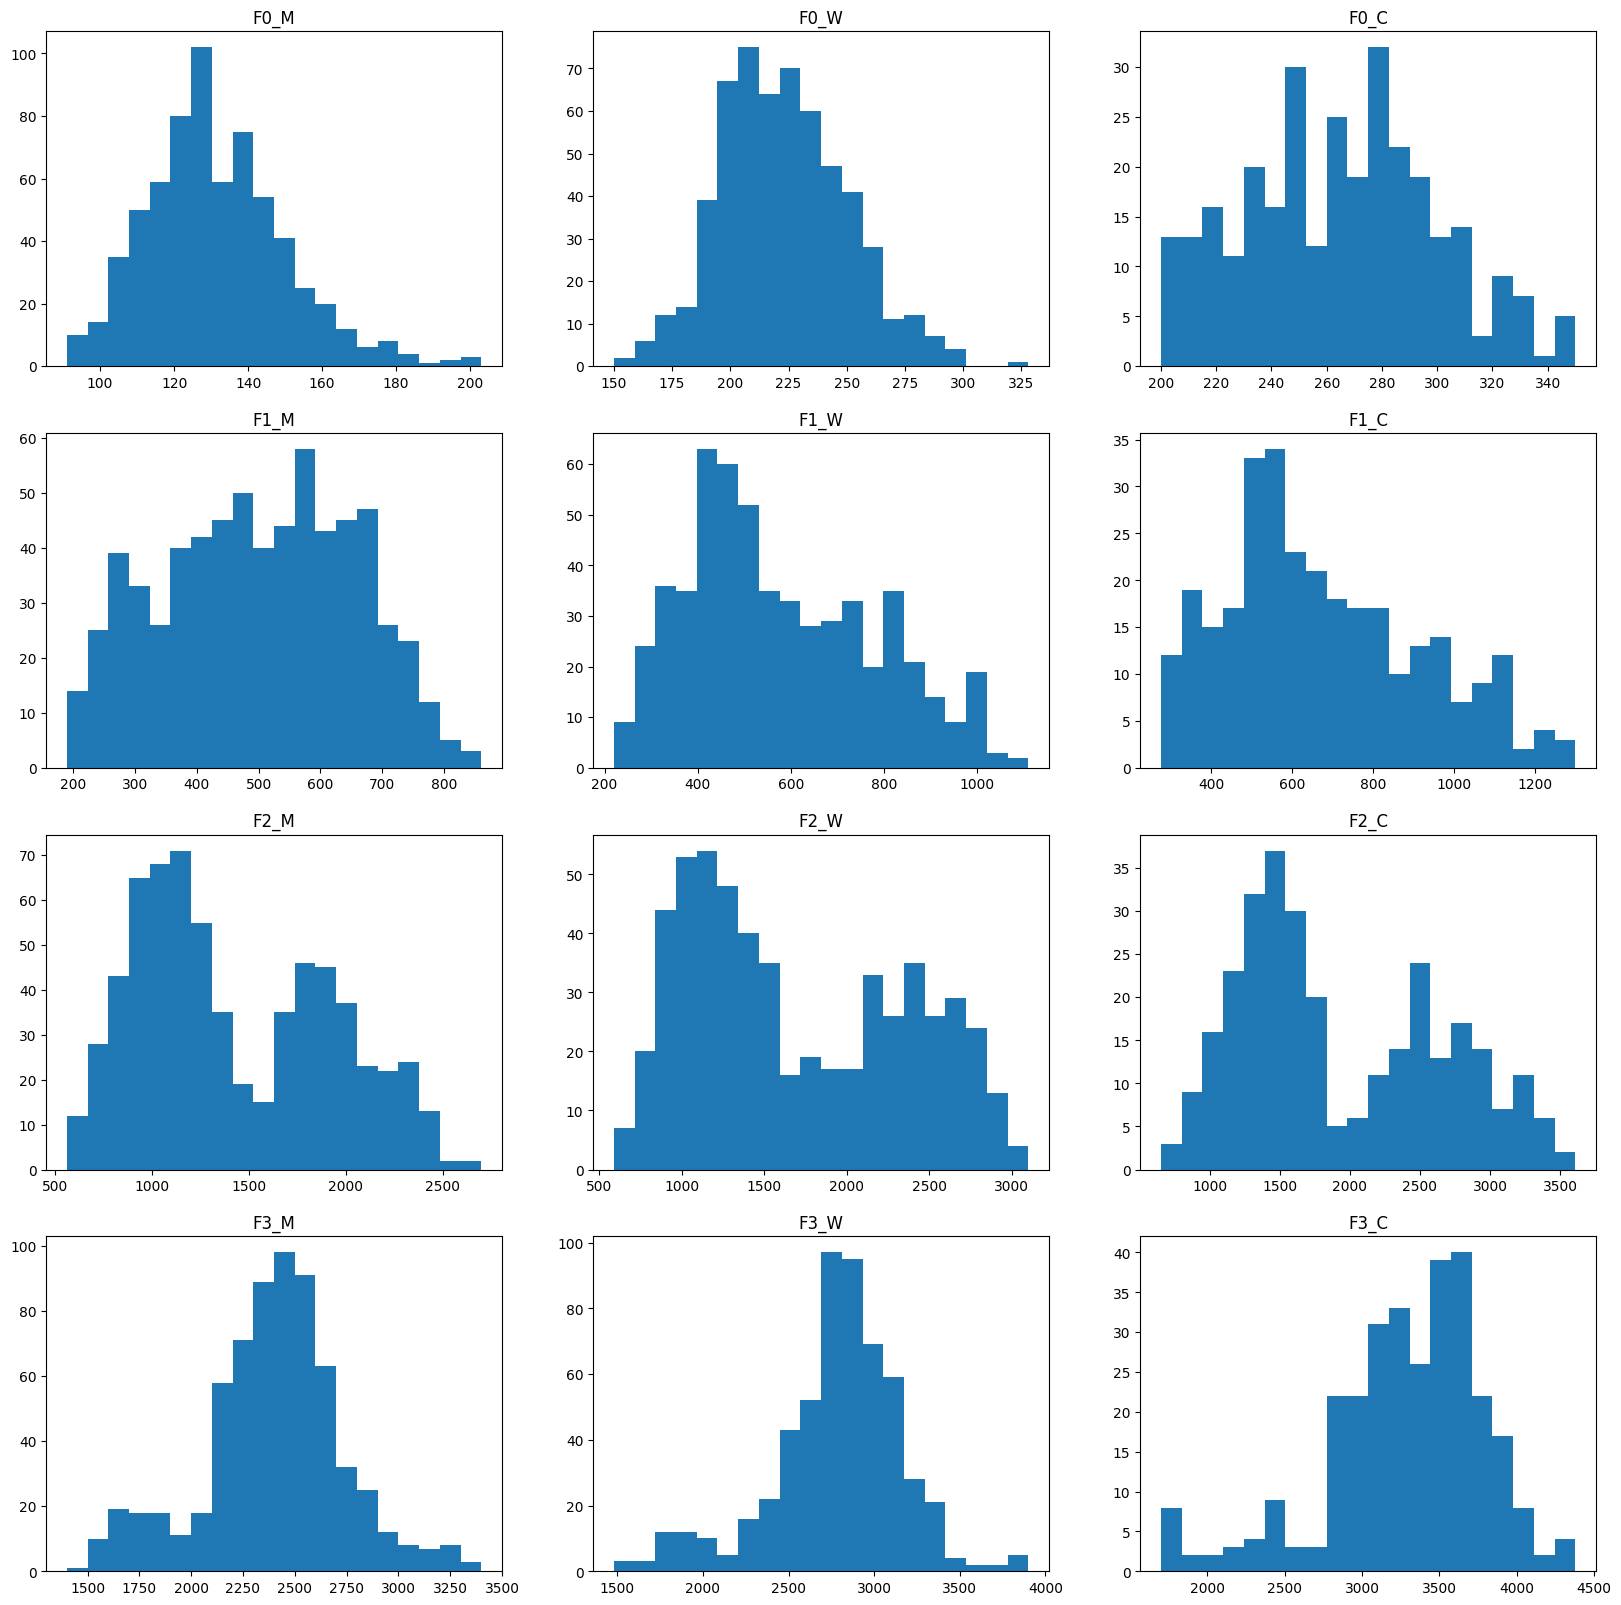

In [7]:
plots = 4
types = df['Sex'].nunique()
typelist = df['Sex'].unique()
fig,ax = plt.subplots(nrows=plots,ncols=types,figsize=[20,20])
for i in range(plots):
    for j,instance in enumerate(typelist):
        subset = df[df['Sex']==instance]
        ax[i][j].hist(subset['F'+str(i)],bins=20)
        ax[i][j].set_title('F'+str(i)+'_'+instance)
plt.show()

In [8]:
subset

,Sex,ID,vowel,F0,F1,F2,F3
1220,C,62,IY,228.0,460.0,3300.0,3950.0
1221,C,62,IY,200.0,400.0,3400.0,3850.0
1222,C,62,IH,205.0,600.0,2550.0,4000.0
1223,C,62,IH,205.0,610.0,2500.0,4100.0
1224,C,62,EH,225.0,600.0,2750.0,3600.0
...,...,...,...,...,...,...,...
1515,C,76,UH,322.0,610.0,1550.0,3400.0
1516,C,76,UW,345.0,520.0,1250.0,3460.0
1517,C,76,UW,334.0,500.0,1140.0,3380.0
1518,C,76,ER,308.0,740.0,1850.0,2160.0


For Single Normal Distributions

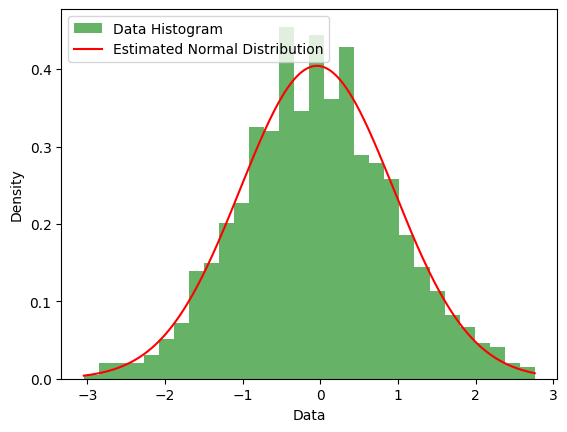

EM Estimates (Single Component):
mean: -0.045256707490195384
variance: 0.9742344563121542


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


def compute_responsibilities_single(data, mean, variance):
    return np.ones_like(data)


def update_parameters_single(data, responsibility):
    mean = np.sum(responsibility * data) / np.sum(responsibility)
    variance = np.sum(responsibility * (data - mean) ** 2) / np.sum(responsibility)
    return mean, variance


def em_algorithm_single(
    data, initial_mean, initial_variance, max_iter=100, tolerance=1e-6
):
    mean = initial_mean
    variance = initial_variance

    for i in range(max_iter):
        # M-step
        responsibility = compute_responsibilities_single(data, mean, variance)
        new_mean, new_variance = update_parameters_single(data, responsibility)

        # Check convergence
        if (
            np.abs(new_mean - mean) < tolerance
            and np.abs(new_variance - variance) < tolerance
        ):
            break

        mean, variance = new_mean, new_variance

    return mean, variance


# Generate synthetic data following a normal distribution
np.random.seed(0)
n_samples = 1000
mean_true = 0
variance_true = 1
data = np.random.normal(mean_true, np.sqrt(variance_true), n_samples)

# Initialize parameters
initial_mean = 0
initial_variance = 1

# Run EM algorithm for single component
mean_em, variance_em = em_algorithm_single(data, initial_mean, initial_variance)

# Plot histogram of data
plt.hist(data, bins=30, density=True, alpha=0.6, color="g", label="Data Histogram")

# Plot estimated normal distribution
x = np.linspace(min(data), max(data), 1000)
pdf = norm.pdf(x, mean_em, np.sqrt(variance_em))
plt.plot(x, pdf, "r-", label="Estimated Normal Distribution")

plt.xlabel("Data")
plt.ylabel("Density")
plt.legend()
plt.show()

# Print estimates
print("EM Estimates (Single Component):")
print("mean:", mean_em)
print("variance:", variance_em)

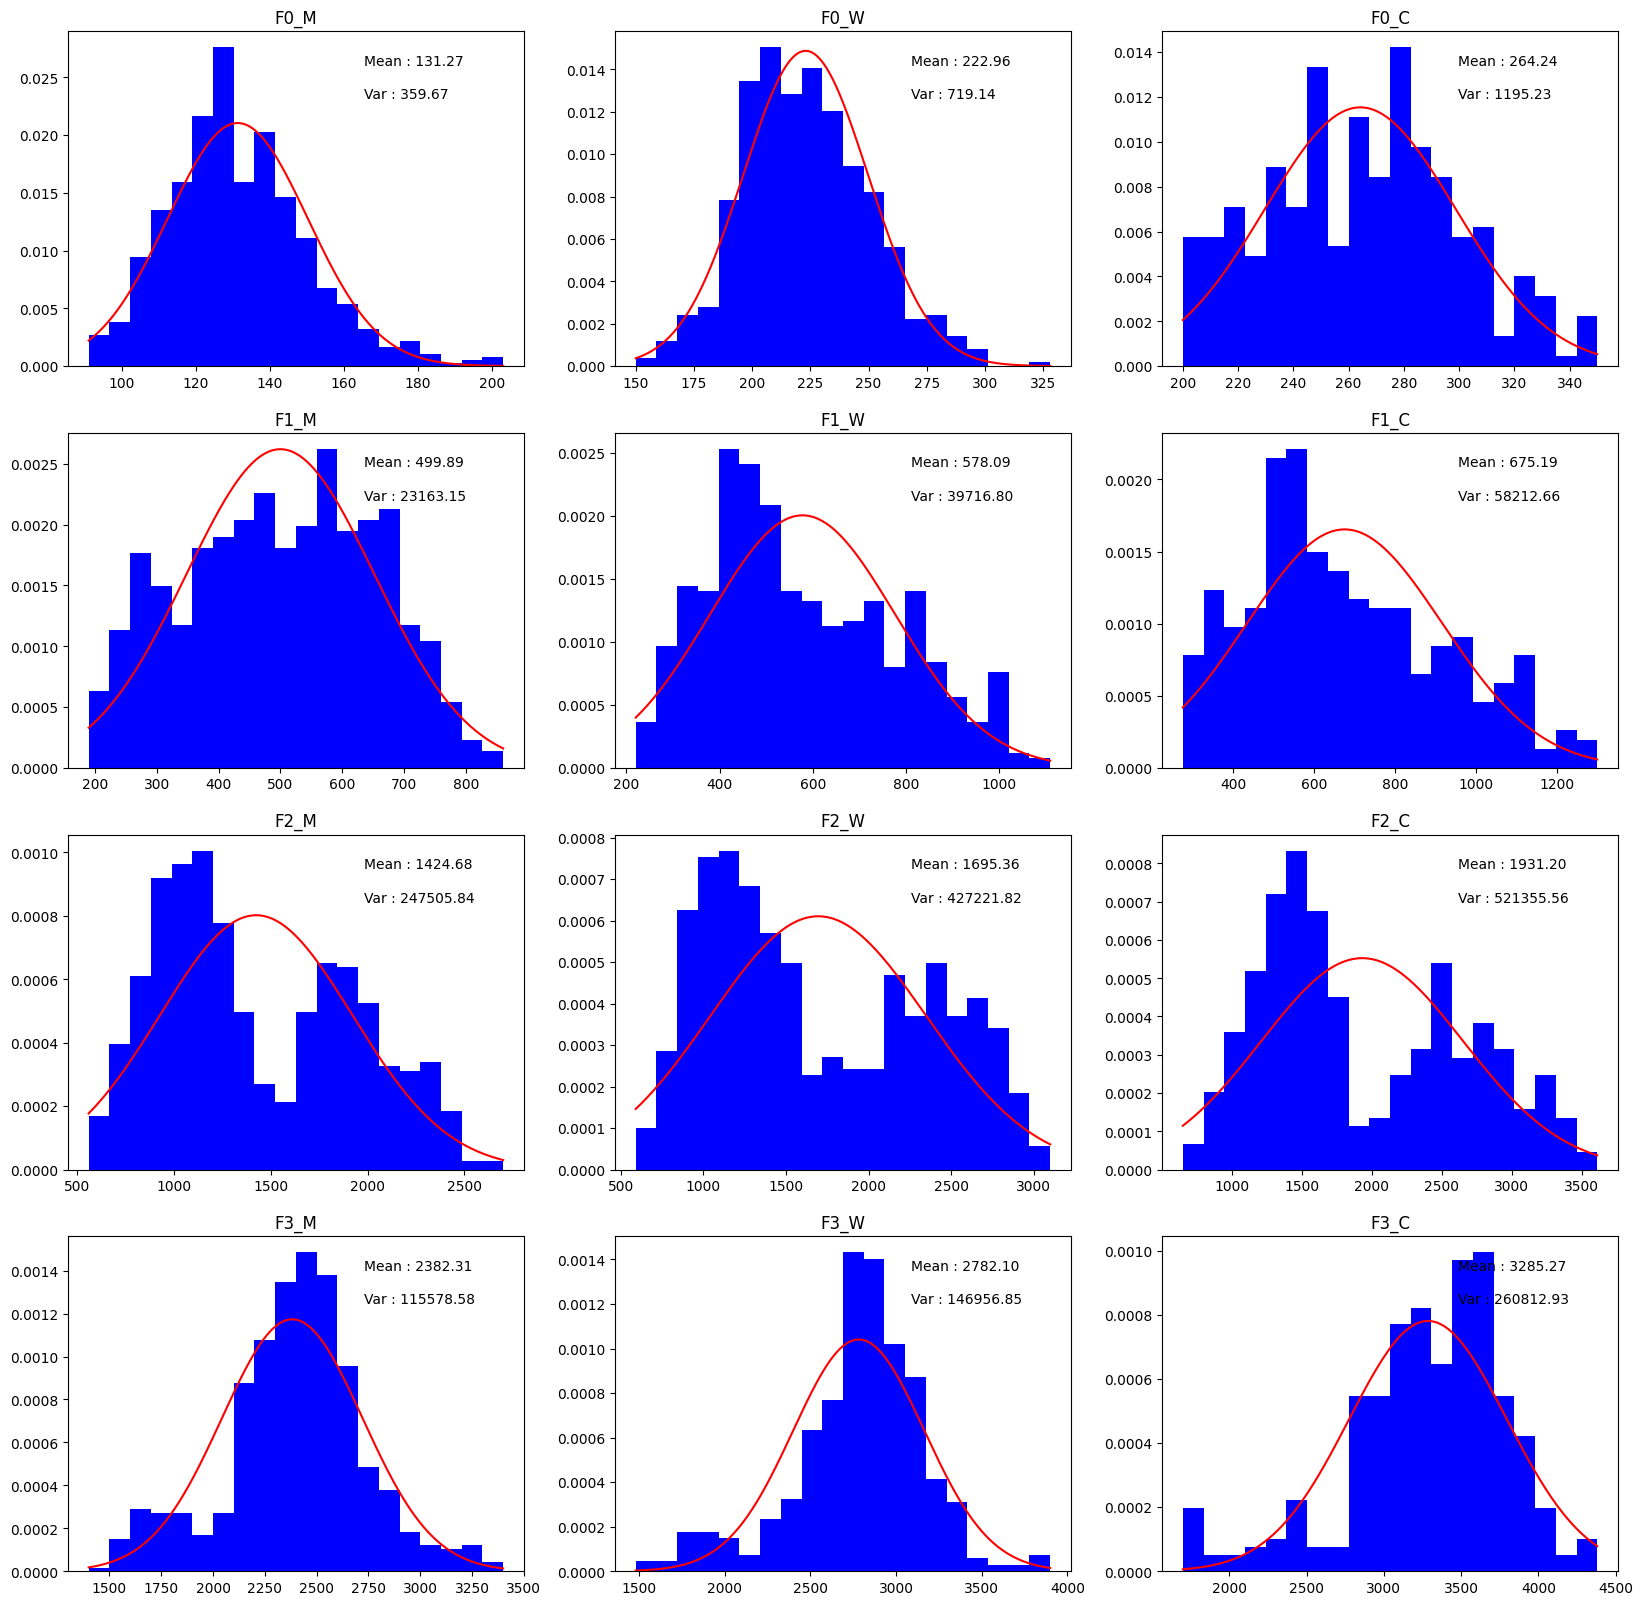

In [10]:
plots = 4
types = df['Sex'].nunique()
typelist = df['Sex'].unique()
fig,ax = plt.subplots(nrows=plots,ncols=types,figsize=[20,20])
for i in range(plots):
    for j,instance in enumerate(typelist):
        subset = df[df['Sex']==instance]
        data = subset['F'+str(i)].values
        initial_mean = 0
        initial_variance = 1
        mean_em, variance_em = em_algorithm_single(data, initial_mean, initial_variance)
        x = np.linspace(min(data), max(data), 1000)
        pdf = norm.pdf(x, mean_em, np.sqrt(variance_em))
        ax[i][j].hist(data, bins=20, density=True,  color='b', label='Data Histogram')
        ax[i][j].plot(x, pdf, 'r-', label='Estimated Normal Distribution')
        ax[i][j].set_title('F'+str(i)+'_'+instance)
        ax[i][j].text(0.65,0.9,f"Mean : {mean_em:.2f}",transform=ax[i][j].transAxes)
        ax[i][j].text(0.65,0.8,f"Var : {variance_em:.2f}",transform=ax[i][j].transAxes)
        
plt.show()

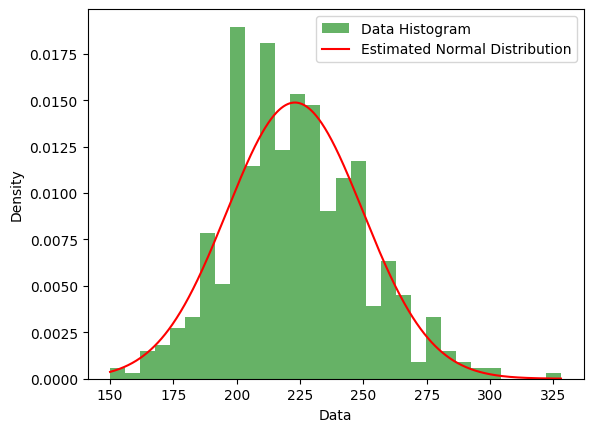

EM Estimates (Single Component):
mean: 222.9607142857143
variance: 719.1413137755102


In [11]:
data=df[df['Sex']=='W']
data=data['F0'].values

mean_em, variance_em = em_algorithm_single(data, initial_mean, initial_variance)

# Plot histogram of data
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Data Histogram')

# Plot estimated normal distribution
x = np.linspace(min(data), max(data), 1000)
pdf = norm.pdf(x, mean_em, np.sqrt(variance_em))
plt.plot(x, pdf, 'r-', label='Estimated Normal Distribution')

plt.xlabel('Data')
plt.ylabel('Density')
plt.legend()
plt.show()

# Print estimates
print("EM Estimates (Single Component):")
print("mean:", mean_em)
print("variance:", variance_em)


Mixture of two normal distributions

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# E-step: Compute responsibilities
def compute_responsibilities(data, p, mean1, variance1, mean2, variance2):
    likelihood1 = p * norm.pdf(data, mean1, np.sqrt(variance1)+1e-10)
    likelihood2 = (1 - p) * norm.pdf(data, mean2, np.sqrt(variance2)+1e-10)
    total_likelihood = likelihood1 + likelihood2
    total_likelihood[total_likelihood == 0] = np.finfo(float).eps  # Avoid division by zero
    responsibility1 = likelihood1 / total_likelihood
    responsibility2 = likelihood2 / total_likelihood
    return responsibility1, responsibility2

# M-step: Update parameters
# M-step: Update parameters
def update_parameters(data, responsibility1, responsibility2):
    p = np.mean(responsibility1)
    
    # Handle the case where responsibility is very small or zero
    sum_responsibility1 = np.sum(responsibility1)
    mean1 = np.sum(responsibility1 * data) / (sum_responsibility1 + 1e-10)
    variance1 = np.sum(responsibility1 * (data - mean1)**2) / (sum_responsibility1 + 1e-10)
    
    sum_responsibility2 = np.sum(responsibility2)
    mean2 = np.sum(responsibility2 * data) / (sum_responsibility2 + 1e-10)
    variance2 = np.sum(responsibility2 * (data - mean2)**2) / (sum_responsibility2 + 1e-10)
    
    return p, mean1, variance1, mean2, variance2

# EM algorithm for mixture of normal distributions
def em_algorithm(data, initial_p, initial_mean1, initial_variance1, initial_mean2, initial_variance2, max_iter=100, tolerance=1e-6):
    p = initial_p
    mean1 = initial_mean1
    variance1 = initial_variance1
    mean2 = initial_mean2
    variance2 = initial_variance2
    
    
    for i in range(max_iter):
        # E-step
        responsibility1, responsibility2 = compute_responsibilities(data, p, mean1, variance1, mean2, variance2)
        # M-step
        new_p, new_mean1, new_variance1, new_mean2, new_variance2 = update_parameters(data, responsibility1, responsibility2)
        
        # Check convergence
        if np.abs(new_p - p) < tolerance and np.abs(new_mean1 - mean1) < tolerance and np.abs(new_variance1 - variance1) < tolerance \
            and np.abs(new_mean2 - mean2) < tolerance and np.abs(new_variance2 - variance2) < tolerance:
            break
        
        p, mean1, variance1, mean2, variance2 = new_p, new_mean1, new_variance1, new_mean2, new_variance2
    
    return p, mean1, variance1, mean2, variance2



(1000,)


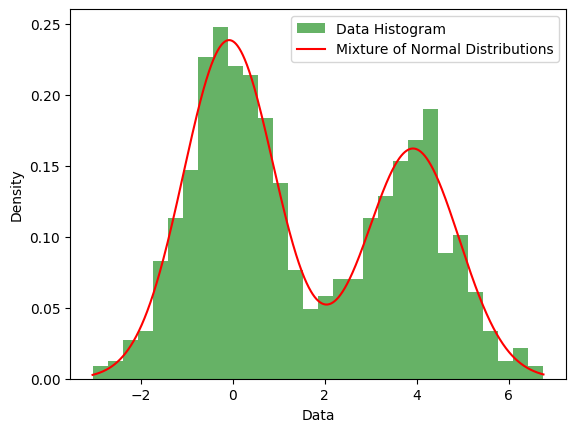

EM Estimates (Mixture of Normal Distributions):
p: 0.5919611944224469
mean1: -0.07803779285646456
variance1: 0.9817650636514611
mean2: 3.9234960393357596
variance2: 1.009568931483981


In [13]:
# Generate synthetic data following a mixture of two normal distributions
np.random.seed(0)
n_samples = 1000
p_true = 0.6
mean1_true = 0
variance1_true = 1
mean2_true = 4
variance2_true = 1
data = np.concatenate([np.random.normal(mean1_true, np.sqrt(variance1_true), int(n_samples * p_true)),
                       np.random.normal(mean2_true, np.sqrt(variance2_true), int(n_samples * (1 - p_true)))])

# Initialize parameters
initial_p = 0.5
initial_mean1 = 0
initial_variance1 = 1
initial_mean2 = 1
initial_variance2 = 1

# Run EM algorithm for mixture of normal distributions
p_em, mean1_em, variance1_em, mean2_em, variance2_em = em_algorithm(data, initial_p, initial_mean1, initial_variance1, initial_mean2, initial_variance2)
print(data.shape)
# Plot histogram of data
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Data Histogram')

# Plot estimated normal distributions
x = np.linspace(min(data), max(data), 1000)
pdf1 = norm.pdf(x, mean1_em, np.sqrt(variance1_em))
pdf2 = norm.pdf(x, mean2_em, np.sqrt(variance2_em))
mixture_pdf = p_em * pdf1 + (1 - p_em) * pdf2
plt.plot(x, mixture_pdf, 'r-', label='Mixture of Normal Distributions')

plt.xlabel('Data')
plt.ylabel('Density')
plt.legend()
plt.show()

# Print MLE estimates
print("EM Estimates (Mixture of Normal Distributions):")
print("p:", p_em)
print("mean1:", mean1_em)
print("variance1:", variance1_em)
print("mean2:", mean2_em)
print("variance2:", variance2_em)

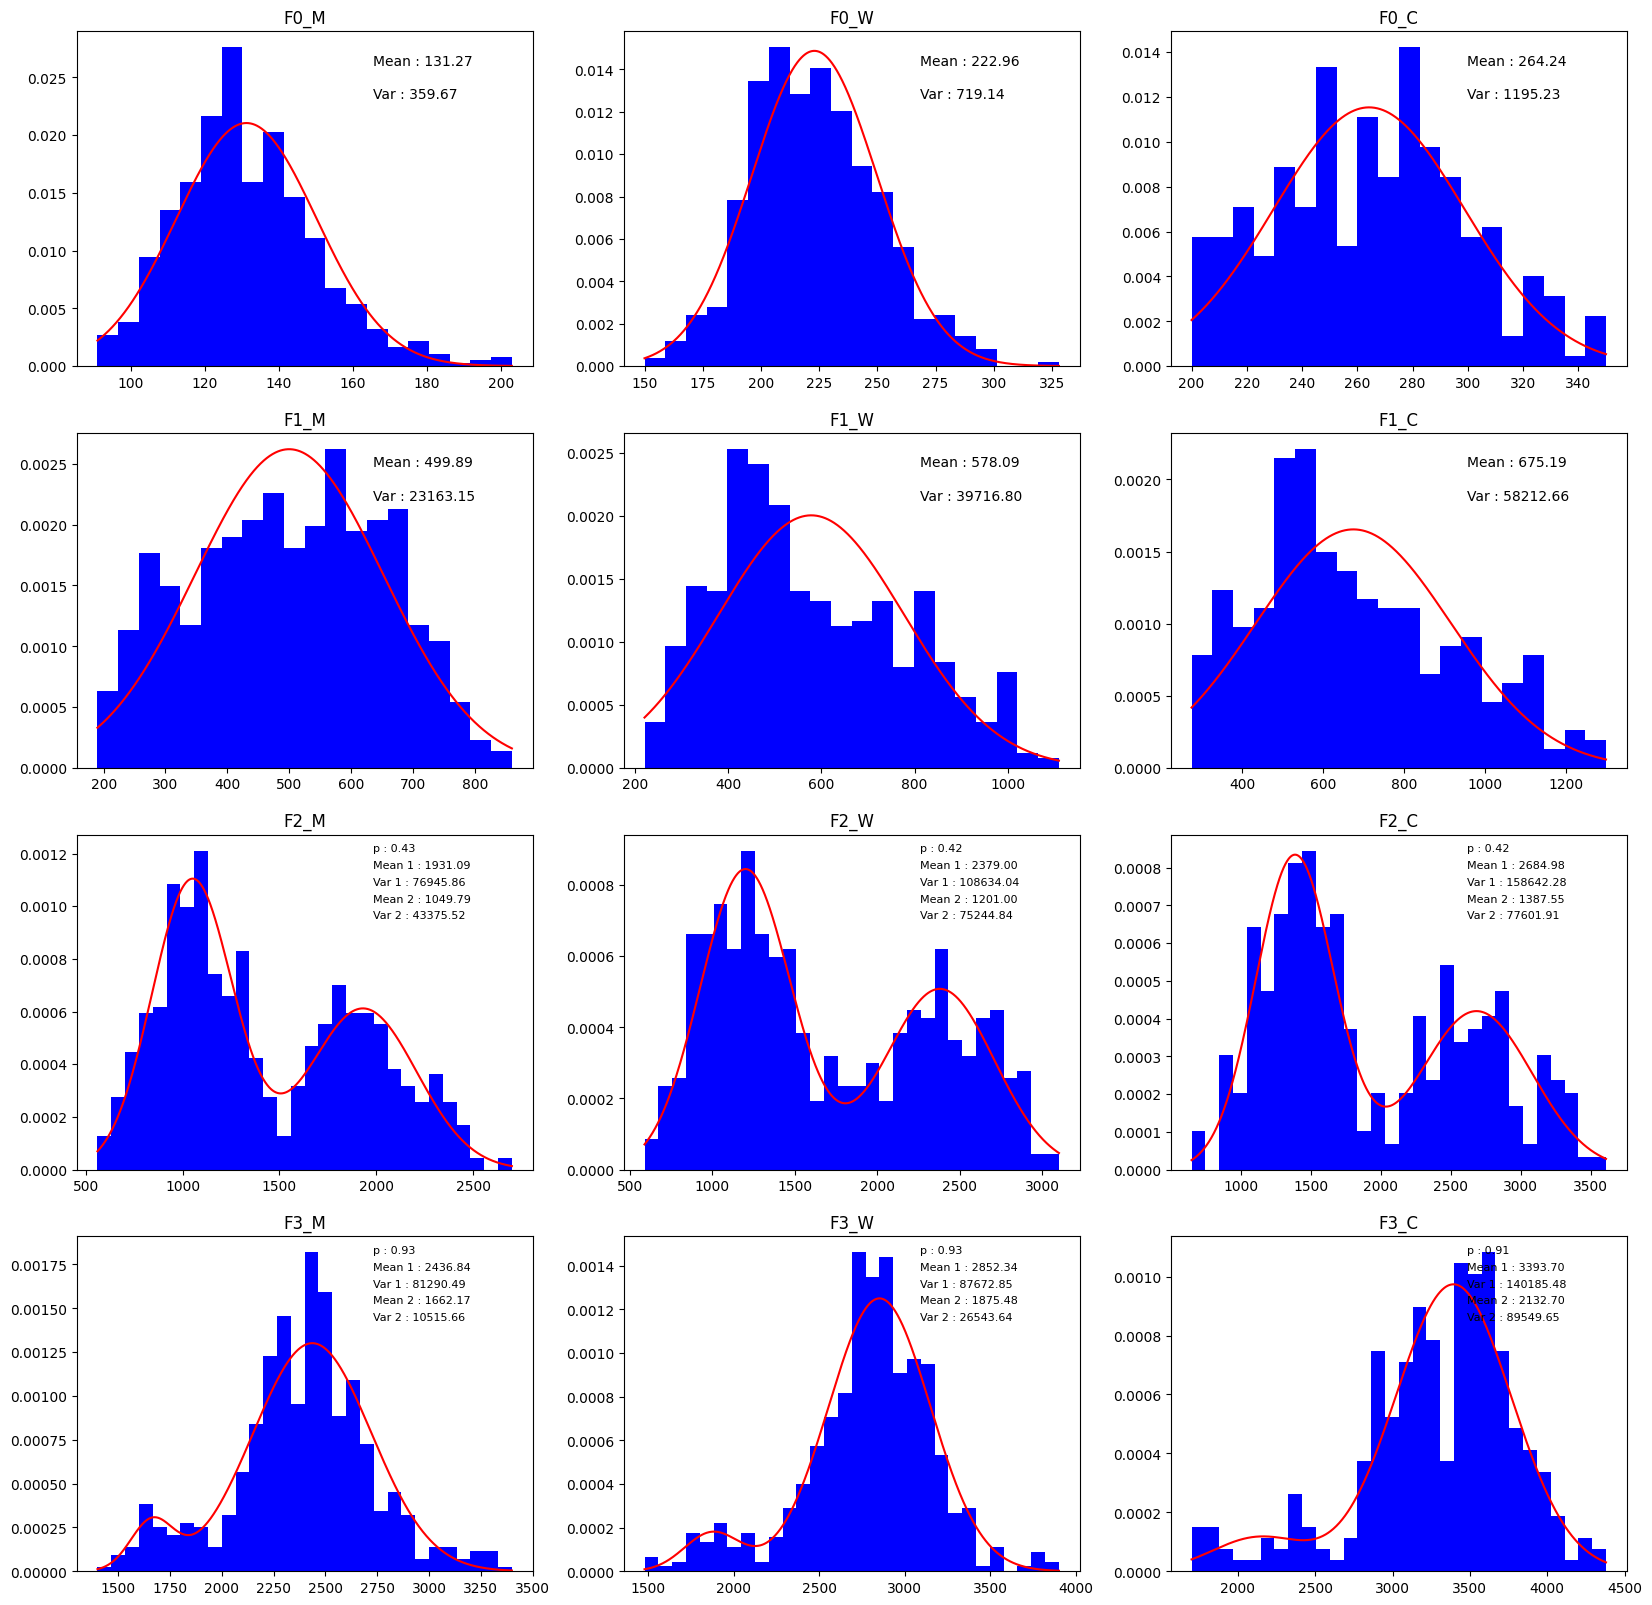

In [14]:
plots = 4
types = df['Sex'].nunique()
typelist = df['Sex'].unique()
fig,ax = plt.subplots(nrows=plots,ncols=types,figsize=[20,20])
for i in range(plots):
    for j,instance in enumerate(typelist):
        if i==0 or i==1:
            subset = df[df['Sex']==instance]
            data = subset['F'+str(i)].values
            initial_mean = 0
            initial_variance = 1
            mean_em, variance_em = em_algorithm_single(data, initial_mean, initial_variance)
            x = np.linspace(min(data), max(data), 1000)
            pdf = norm.pdf(x, mean_em, np.sqrt(variance_em))
            ax[i][j].hist(data, bins=20, density=True,  color='b', label='Data Histogram')
            ax[i][j].plot(x, pdf, 'r-', label='Estimated Normal Distribution')
            ax[i][j].set_title('F'+str(i)+'_'+instance)
            ax[i][j].text(0.65,0.9,f"Mean : {mean_em:.2f}",transform=ax[i][j].transAxes)
            ax[i][j].text(0.65,0.8,f"Var : {variance_em:.2f}",transform=ax[i][j].transAxes)
        elif i==2 or i==3:
            subset = df[df['Sex']==instance]
            data = subset['F'+str(i)].values
            initial_p = 0.3
            initial_mean1 = np.mean(data)
            initial_variance1 = np.var(data)
            initial_mean2 = np.mean(data)/2
            initial_variance2 = np.var(data)/2
            p_em, mean1_em, variance1_em, mean2_em, variance2_em = em_algorithm(data, initial_p, initial_mean1, initial_variance1,initial_mean2, initial_variance2)
            x = np.linspace(min(data), max(data), 1000)
            pdf1 = norm.pdf(x, mean1_em, np.sqrt(variance1_em))
            pdf2 = norm.pdf(x, mean2_em, np.sqrt(variance2_em))
            mixture_pdf = p_em * pdf1 + (1 - p_em) * pdf2         
            ax[i][j].hist(data, bins=30, density=True, alpha=1, color='b', label='Data Histogram')
            ax[i][j].plot(x, mixture_pdf, 'r-', label='Mixture of Normal Distributions')
            ax[i][j].set_title('F'+str(i)+'_'+instance)
            ax[i][j].text(0.65,0.95,f"p : {p_em:.2f}",transform=ax[i][j].transAxes,fontsize=8)
            ax[i][j].text(0.65,0.9,f"Mean 1 : {mean1_em:.2f}",transform=ax[i][j].transAxes,fontsize=8)
            ax[i][j].text(0.65,0.85,f"Var 1 : {variance1_em:.2f}",transform=ax[i][j].transAxes,fontsize=8)
            ax[i][j].text(0.65,0.8,f"Mean 2 : {mean2_em:.2f}",transform=ax[i][j].transAxes,fontsize=8)
            ax[i][j].text(0.65,0.75,f"Var 2 : {variance2_em:.2f}",transform=ax[i][j].transAxes,fontsize=8)
plt.show()